In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import linear_model, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("output_with_text.csv", encoding = "utf-8")
df.head()

,Unnamed: 0,state,full_job_title,company_name,url,job_class,Text
0,1,Texas,Epic Business Intelligence Dev,Cook Children's Health Care System,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Summary: The Business Intelligence Developer i...
1,2,Texas,Business Intelligence Data Developer,Indeed,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Our mission:\nAs the world’s number 1 job site...
2,3,Texas,AD0754 Business Intelligence Front End Develop...,CommuniCare Health Centers,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,The Business Intelligence Front End Developer ...
3,4,Texas,Business Intelligence Data Architect,Driscoll Children's Hospital,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Knowledge of: principles and practices of ente...
4,5,Texas,Business Intelligence Analyst - Tableau,Adthena,http://www.indeed.com/rc/clk?jk=b99ed97c7cbcb4...,business+intelligence,Why would I want to be a Business Intelligence...


In [3]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

In [4]:
#lowercase
df["Text_1"] = df.Text.str.lower()
#remove \n
df["Text_2"] = df.Text_1.str.replace("\\n", " ")
#remove punctuation and tokenize
df["Tokens"] = df.apply(lambda row: tokenizer.tokenize(row['Text_2']), axis=1)
#remove stopwords
df['Tokens_1'] = df['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])
#merge tokens back into string text
df['Text_3']=[" ".join(txt) for txt in df["Tokens_1"].values]
#create bigrams
df["Tokens_2"] = df["Tokens_1"].apply(lambda row: list(ngrams(row, 2)))
df.head()

,Unnamed: 0,state,full_job_title,company_name,url,job_class,Text,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2
0,1,Texas,Epic Business Intelligence Dev,Cook Children's Health Care System,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Summary: The Business Intelligence Developer i...,summary: the business intelligence developer i...,summary: the business intelligence developer i...,"[summary, the, business, intelligence, develop...","[summary, business, intelligence, developer, e...",summary business intelligence developer emergi...,"[(summary, business), (business, intelligence)..."
1,2,Texas,Business Intelligence Data Developer,Indeed,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Our mission:\nAs the world’s number 1 job site...,our mission:\nas the world’s number 1 job site...,"our mission: as the world’s number 1 job site,...","[our, mission, as, the, world, s, number, 1, j...","[mission, world, number, 1, job, site, mission...",mission world number 1 job site mission help p...,"[(mission, world), (world, number), (number, 1..."
2,3,Texas,AD0754 Business Intelligence Front End Develop...,CommuniCare Health Centers,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,The Business Intelligence Front End Developer ...,the business intelligence front end developer ...,the business intelligence front end developer ...,"[the, business, intelligence, front, end, deve...","[business, intelligence, front, end, developer...",business intelligence front end developer fulf...,"[(business, intelligence), (intelligence, fron..."
3,4,Texas,Business Intelligence Data Architect,Driscoll Children's Hospital,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Knowledge of: principles and practices of ente...,knowledge of: principles and practices of ente...,knowledge of: principles and practices of ente...,"[knowledge, of, principles, and, practices, of...","[knowledge, principles, practices, enterprise,...",knowledge principles practices enterprise data...,"[(knowledge, principles), (principles, practic..."
4,5,Texas,Business Intelligence Analyst - Tableau,Adthena,http://www.indeed.com/rc/clk?jk=b99ed97c7cbcb4...,business+intelligence,Why would I want to be a Business Intelligence...,why would i want to be a business intelligence...,why would i want to be a business intelligence...,"[why, would, i, want, to, be, a, business, int...","[would, want, business, intelligence, analyst,...",would want business intelligence analyst adthe...,"[(would, want), (want, business), (business, i..."


In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(df.job_class)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [68]:
v = TfidfVectorizer(max_features=100)
#v.fit(df.iloc[0:3,7])
x = df["Text_3"]
v.fit(x)
#print(v.vocabulary_)
#print(v2.vocabulary_.get("analytical"))
v2={}
for a, b in v.vocabulary_.items():
    v2[b] = a

In [71]:
print(v2.get(71))

reports


In [54]:
x_tfidf = v.transform(x)

#print(v)
print(x_tfidf)
#x = v.fit_transform(df["Text_3"])
#print(x)

  (0, 99)	0.06403384492233558
  (0, 98)	0.03928679783992241
  (0, 96)	0.05077812867339534
  (0, 92)	0.0784091455095506
  (0, 90)	0.0480242277742661
  (0, 88)	0.13730147926577363
  (0, 87)	0.04838176081944837
  (0, 86)	0.032139115325485676
  (0, 85)	0.04609255397674695
  (0, 84)	0.04245055538826598
  (0, 83)	0.04029599181524335
  (0, 81)	0.11401102889008742
  (0, 80)	0.16720811114752307
  (0, 78)	0.06679265739961235
  (0, 73)	0.12431735431137529
  (0, 72)	0.19851089409985553
  (0, 71)	0.21676328662428693
  (0, 67)	0.048866863366855265
  (0, 66)	0.09110528487856771
  (0, 61)	0.08251937895382759
  (0, 53)	0.05745701970208534
  (0, 43)	0.04064199113467702
  (0, 40)	0.3153994755978144
  (0, 38)	0.04598360101902615
  (0, 36)	0.04134923703473925
  :	:
  (547, 60)	0.3133600002842387
  (547, 58)	0.19565988927731123
  (547, 57)	0.07578384012342955
  (547, 50)	0.14776645943911898
  (547, 48)	0.10445748823440719
  (547, 45)	0.08599708222903735
  (547, 44)	0.18322384085531654
  (547, 41)	0.12371832

In [42]:
# fit the training dataset on the NB classifier
#n = naive_bayes.MultinomialNB()
#n.fit(x_tfidf, y)# predict the labels on validation dataset
#n_pred = naive.predict(x_tfidf)# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(naive_pred, y)*100)

In [52]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
#s = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
s = svm.LinearSVC(C=1.0)
s.fit(x_tfidf, y)# predict the labels on validation dataset
s_pred = s.predict(x_tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(s_pred, y)*100)

SVM Accuracy Score ->  87.22627737226277


In [45]:
s.coef_[0]

array([ 0.54645437,  1.18823808, -0.09775433, -0.75050285,  0.11607627,
        0.9066627 ,  0.07274092, -0.08507196, -0.42719128,  0.29801817,
        1.6354616 , -0.2719081 , -0.4687834 ,  1.24583246, -0.62575097,
        0.49101657,  0.91509399, -0.13812887,  0.25449331,  1.06889845,
        0.27262782,  0.60157903, -1.34431415,  0.52654789,  1.07151741,
        0.22127087, -0.15814637,  0.06124558,  0.13828585,  0.31967005,
       -0.15082429, -0.21634334, -0.59061605,  0.00808655,  0.19512799,
        0.04173422, -0.20130741,  0.46498973,  0.53161169, -0.04678861,
        4.3916971 ,  0.32588949, -0.29721369,  0.19216142,  0.06914267,
        0.74478338, -0.11980754, -0.44665769, -0.78317752, -0.0180091 ,
       -0.04411507,  0.22843306,  0.12847637,  0.28985514,  0.73063438,
       -1.24488879, -0.21590684, -0.45299845,  0.780756  , -0.93677147,
       -0.20039713, -0.40624445, -0.01107293, -0.03568364, -0.52815361,
       -0.97245453, -0.50522868,  0.6394515 ,  0.10124216, -0.49

In [10]:
#confusion_matrix(s_pred, y)
#y_true = [2, 0, 2, 2, 0, 1]
#y_pred = [0, 0, 2, 2, 0, 2]
#confusion_matrix(y_true, y_pred)

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 92   5   2   2   1]
 [  5  97   2   7   0]
 [  4   5  94  10   0]
 [  4   7   8  92   1]
 [  0   0   1   0 109]]


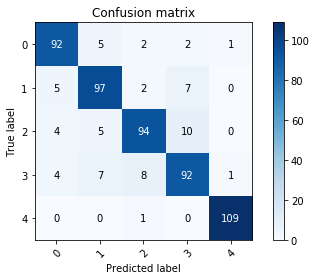

In [12]:
class_names = np.unique(y)
plot_confusion_matrix(y, s_pred, classes=class_names, title='Confusion matrix')

In [13]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [14]:
#df.Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "business+intelligence"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "data+scientist"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "data+analyst"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "full+stack+developer"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "data+engineer"].Text_3.str.split(expand=True).stack().value_counts()

In [15]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'business intelligence',
        "1": 'data analyst',
        "2": 'data engineer',
        "3": 'data scientist',
        "4": 'full stack developer'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.set_palette("hls", 5)
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    #palette=["red", "orange", "darkgreen", "blue", "purple"],
                    alpha=.7).set_title(title);

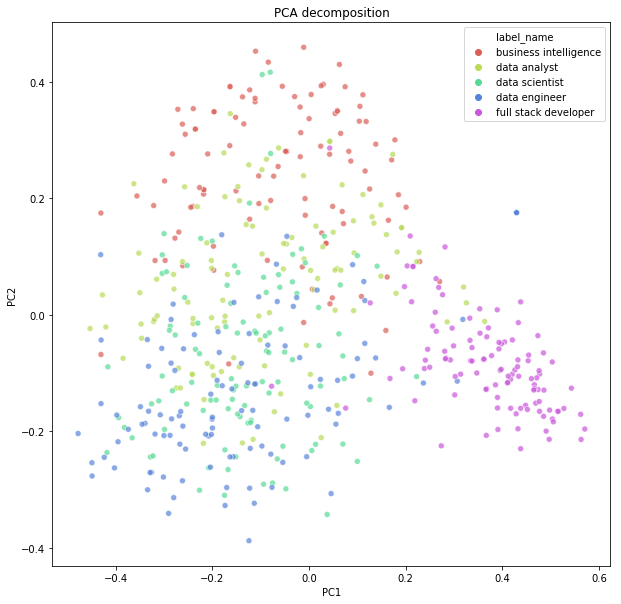

In [16]:
plot_dim_red("PCA", features=x_tfidf.toarray(), labels=y, n_components=2)
#help(PCA.fit_transform)
#x_tfidf
#help(sns.set_palette)

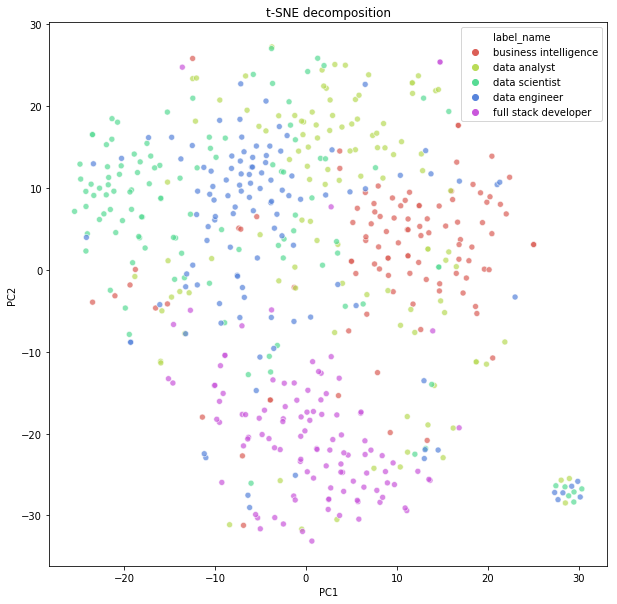

In [74]:
plot_dim_red("TSNE", features=x_tfidf.toarray(), labels=y, n_components=2)

In [18]:
x_tfidf.toarray()

array([[0.10693742, 0.0535564 , 0.        , ..., 0.        , 0.        ,
        0.05544114],
       [0.04022242, 0.        , 0.09870231, ..., 0.1699564 , 0.        ,
        0.09383896],
       [0.06642439, 0.0998    , 0.        , ..., 0.        , 0.09158855,
        0.05165606],
       ...,
       [0.        , 0.        , 0.05007598, ..., 0.05748418, 0.11254958,
        0.09521718],
       [0.        , 0.        , 0.14297485, ..., 0.        , 0.4820203 ,
        0.        ],
       [0.05814581, 0.        , 0.07134238, ..., 0.        , 0.        ,
        0.31652661]])

In [19]:
df["SVM_Prediction"] = s_pred

In [20]:
df.head()

,Unnamed: 0,state,full_job_title,company_name,url,job_class,Text,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2,SVM_Prediction
0,1,Texas,Epic Business Intelligence Dev,Cook Children's Health Care System,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Summary: The Business Intelligence Developer i...,summary: the business intelligence developer i...,summary: the business intelligence developer i...,"[summary, the, business, intelligence, develop...","[summary, business, intelligence, developer, e...",summary business intelligence developer emergi...,"[(summary, business), (business, intelligence)...",0
1,2,Texas,Business Intelligence Data Developer,Indeed,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Our mission:\nAs the world’s number 1 job site...,our mission:\nas the world’s number 1 job site...,"our mission: as the world’s number 1 job site,...","[our, mission, as, the, world, s, number, 1, j...","[mission, world, number, 1, job, site, mission...",mission world number 1 job site mission help p...,"[(mission, world), (world, number), (number, 1...",2
2,3,Texas,AD0754 Business Intelligence Front End Develop...,CommuniCare Health Centers,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,The Business Intelligence Front End Developer ...,the business intelligence front end developer ...,the business intelligence front end developer ...,"[the, business, intelligence, front, end, deve...","[business, intelligence, front, end, developer...",business intelligence front end developer fulf...,"[(business, intelligence), (intelligence, fron...",0
3,4,Texas,Business Intelligence Data Architect,Driscoll Children's Hospital,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,business+intelligence,Knowledge of: principles and practices of ente...,knowledge of: principles and practices of ente...,knowledge of: principles and practices of ente...,"[knowledge, of, principles, and, practices, of...","[knowledge, principles, practices, enterprise,...",knowledge principles practices enterprise data...,"[(knowledge, principles), (principles, practic...",0
4,5,Texas,Business Intelligence Analyst - Tableau,Adthena,http://www.indeed.com/rc/clk?jk=b99ed97c7cbcb4...,business+intelligence,Why would I want to be a Business Intelligence...,why would i want to be a business intelligence...,why would i want to be a business intelligence...,"[why, would, i, want, to, be, a, business, int...","[would, want, business, intelligence, analyst,...",would want business intelligence analyst adthe...,"[(would, want), (want, business), (business, i...",0


In [21]:
df.to_csv("predictions.csv", encoding='utf-8')

In [22]:
214	Texas	Associate Data Scientist	Spectrum	http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BU46C0Y73r5a5tmLoLH311CnVOEWUPkwg4-L_9TA5X_gEiWuDoCQBFIaVwwWH4PVouOPLOD60SiE17hK3PcYWwMbOHlV4D_qKoeyX0CXDEvnXFaLguBpKt4vqT2ApEmemw3xWLUYsdo4112n7l7U9wGJznveXzrLSVrbFv6Vn9AdE8lfL4LIMCKjk-VoVwn3H6gp4ETkYlVWdctiO9rbdjh7SJuhhk5wUt4EezCZQGzWu6qPRhW8ir6m_dRzT0qi5PdaSLbPfpCkhpAMMaBltv0hkPzGrMHvW-I4nmrO8m6vGqP1-1HMrNq8hrsBGQIR6GrCvVjoYNqI0jE-4t933ALkKq0dVDeQimjuo3wacU6r0pnT95rGdYAaYXrIbiJd2_c8SUGkuU0EWLBo9gbRAsQqU5AiLaSH0ahcFhwgxDQCwS8yahIHpjXfonYpBGX7dj0WxEM21_WuhRkXbzF8GJZBnzHuwhXQuHPcNnxaCAFesGW_g6WfTqlB1NUYSicQFCfrq49FD-U6vuxrAs3m-i5tBo6pPp-Gh4S0qIQ6X56pHxnAHtBCAAOMisQyX0kjFhfNCbKe5q4zKxBJwHZwTAlqR_ItwFbkcpqBJW_vJClbimRRBlI9Rf8Tvi_jcvo1zGrorYocgzifHbEYXRXWS5SIRlPJy2krZQKw-h8yVsTqa5cdD0mvYlcMB8NMwv0bXwW_2oT3FIzYw7IvcIl2CgcaPzpI6qP2kRyzNeLY3H-WmLA2KBEzlnyC28-zArTrvgn88Qz-toECKHVRU7geH_X2X5OJDe1vL6Y-pMO2YtP3RoJLfLlpE31ybFo27LkQffoXDtbZO2L-RqRY_xMRwtwXK9IF6Mm767paxfu-Hx92YhZ6PxOMpz7RFse_-VyXSrRchX-xKAy7sx1ZKFGMrlBuiay0iRN6Br1x4lq0rRjGuGeMHng2jC8LU1YtP-P1GR6Jy8keV8Wkv8DQKqTMb0pjrqhS5pp7iAVKkSFYOyDDXPmhLyF9UABQg3QQ2BP8mRup8mdkII-apbvul4KD3C&p=0&fvj=0&vjs=3	data+scientist	"Client Reference Code: 247840
JOB SUMMARY
The Associate Data Scientist serves as a liaison between the business community and the Behavior Quality organization and/or vendors in order to provide technical solutions to meet user needs. Possesses expertise in the business unit(s) supported as well as an understanding of the IT organization’s systems and capabilities. Provides complex analysis services, translating user needs into detailed analytics and reporting artifacts to deliver a solution for measuring performance and ROI. Works independently with minimal supervision.

MAJOR DUTIES AND RESPONSIBILITIES
Actively and consistently support all efforts to simplify and enhance reporting and analytics and the overall customer experience.


Analyze business partner’s operations to understand strengths and weaknesses in order to determine opportunities to automate processes and functions.

Assist in analytics and dashboard redesign and documentation as needed.

Translate high-level business impacts into functional and specific dashboards that is digestible for various levels of leadership. Manage changes to such specifications.

Facilitate communication internally and with various customers around initial requirements to final implementation.

Work with business partners within one business function to align reporting and data solutions within business strategies.

Assist Project Managers in development of project plans and use associated project planning tools as needed.

Analyze business processes, functions, and procedures to determine most effective data and reporting to meet the needs of the organization.

Establish specifications and objectives based on business requirements; provide recommendations to management personnel.

Collaborate with management in data, dashboard, and reporting development and design.

Perform other duties as assigned.

REQUIRED QUALIFICATIONS
Skills/Abilities and Knowledge
Ability to read, write, speak and understand English
Working knowledge of data, analytics, and reporting tools such as Tableau, Microstrategy, etc.
Excellent interpersonal skills and ability to present performance feedback effectively
Excellent presentation skills with small- to medium-sized groups
Strong analytical ability
Ability to work independently
Education
Bachelor’s degree in business administration, computer science or related analytics field

Related Work Experience
Analytics and reporting experience
Experience training supervisors in a call center environment

PREFERRED QUALIFICATIONS
Skills/Abilities and Knowledge
Demonstrated project management and leadership abilities

Related Work Experience
3+ years of business analysis experience in any scope

WORKING CONDITIONS
Normal office conditions
Job Code : CDA360 Business Analyst - Cust Ops Exempt

247840BR"	"client reference code: 247840
job summary
the associate data scientist serves as a liaison between the business community and the behavior quality organization and/or vendors in order to provide technical solutions to meet user needs. possesses expertise in the business unit(s) supported as well as an understanding of the it organization’s systems and capabilities. provides complex analysis services, translating user needs into detailed analytics and reporting artifacts to deliver a solution for measuring performance and roi. works independently with minimal supervision.

major duties and responsibilities
actively and consistently support all efforts to simplify and enhance reporting and analytics and the overall customer experience.


analyze business partner’s operations to understand strengths and weaknesses in order to determine opportunities to automate processes and functions.

assist in analytics and dashboard redesign and documentation as needed.

translate high-level business impacts into functional and specific dashboards that is digestible for various levels of leadership. manage changes to such specifications.

facilitate communication internally and with various customers around initial requirements to final implementation.

work with business partners within one business function to align reporting and data solutions within business strategies.

assist project managers in development of project plans and use associated project planning tools as needed.

analyze business processes, functions, and procedures to determine most effective data and reporting to meet the needs of the organization.

establish specifications and objectives based on business requirements; provide recommendations to management personnel.

collaborate with management in data, dashboard, and reporting development and design.

perform other duties as assigned.

required qualifications
skills/abilities and knowledge
ability to read, write, speak and understand english
working knowledge of data, analytics, and reporting tools such as tableau, microstrategy, etc.
excellent interpersonal skills and ability to present performance feedback effectively
excellent presentation skills with small- to medium-sized groups
strong analytical ability
ability to work independently
education
bachelor’s degree in business administration, computer science or related analytics field

related work experience
analytics and reporting experience
experience training supervisors in a call center environment

preferred qualifications
skills/abilities and knowledge
demonstrated project management and leadership abilities

related work experience
3+ years of business analysis experience in any scope

working conditions
normal office conditions
job code : cda360 business analyst - cust ops exempt

247840br"	client reference code: 247840 job summary the associate data scientist serves as a liaison between the business community and the behavior quality organization and/or vendors in order to provide technical solutions to meet user needs. possesses expertise in the business unit(s) supported as well as an understanding of the it organization’s systems and capabilities. provides complex analysis services, translating user needs into detailed analytics and reporting artifacts to deliver a solution for measuring performance and roi. works independently with minimal supervision.  major duties and responsibilities actively and consistently support all efforts to simplify and enhance reporting and analytics and the overall customer experience.   analyze business partner’s operations to understand strengths and weaknesses in order to determine opportunities to automate processes and functions.  assist in analytics and dashboard redesign and documentation as needed.  translate high-level business impacts into functional and specific dashboards that is digestible for various levels of leadership. manage changes to such specifications.  facilitate communication internally and with various customers around initial requirements to final implementation.  work with business partners within one business function to align reporting and data solutions within business strategies.  assist project managers in development of project plans and use associated project planning tools as needed.  analyze business processes, functions, and procedures to determine most effective data and reporting to meet the needs of the organization.  establish specifications and objectives based on business requirements; provide recommendations to management personnel.  collaborate with management in data, dashboard, and reporting development and design.  perform other duties as assigned.  required qualifications skills/abilities and knowledge ability to read, write, speak and understand english working knowledge of data, analytics, and reporting tools such as tableau, microstrategy, etc. excellent interpersonal skills and ability to present performance feedback effectively excellent presentation skills with small- to medium-sized groups strong analytical ability ability to work independently education bachelor’s degree in business administration, computer science or related analytics field  related work experience analytics and reporting experience experience training supervisors in a call center environment  preferred qualifications skills/abilities and knowledge demonstrated project management and leadership abilities  related work experience 3+ years of business analysis experience in any scope  working conditions normal office conditions job code : cda360 business analyst - cust ops exempt  247840br	['client', 'reference', 'code', '247840', 'job', 'summary', 'the', 'associate', 'data', 'scientist', 'serves', 'as', 'a', 'liaison', 'between', 'the', 'business', 'community', 'and', 'the', 'behavior', 'quality', 'organization', 'and', 'or', 'vendors', 'in', 'order', 'to', 'provide', 'technical', 'solutions', 'to', 'meet', 'user', 'needs', 'possesses', 'expertise', 'in', 'the', 'business', 'unit', 's', 'supported', 'as', 'well', 'as', 'an', 'understanding', 'of', 'the', 'it', 'organization', 's', 'systems', 'and', 'capabilities', 'provides', 'complex', 'analysis', 'services', 'translating', 'user', 'needs', 'into', 'detailed', 'analytics', 'and', 'reporting', 'artifacts', 'to', 'deliver', 'a', 'solution', 'for', 'measuring', 'performance', 'and', 'roi', 'works', 'independently', 'with', 'minimal', 'supervision', 'major', 'duties', 'and', 'responsibilities', 'actively', 'and', 'consistently', 'support', 'all', 'efforts', 'to', 'simplify', 'and', 'enhance', 'reporting', 'and', 'analytics', 'and', 'the', 'overall', 'customer', 'experience', 'analyze', 'business', 'partner', 's', 'operations', 'to', 'understand', 'strengths', 'and', 'weaknesses', 'in', 'order', 'to', 'determine', 'opportunities', 'to', 'automate', 'processes', 'and', 'functions', 'assist', 'in', 'analytics', 'and', 'dashboard', 'redesign', 'and', 'documentation', 'as', 'needed', 'translate', 'high', 'level', 'business', 'impacts', 'into', 'functional', 'and', 'specific', 'dashboards', 'that', 'is', 'digestible', 'for', 'various', 'levels', 'of', 'leadership', 'manage', 'changes', 'to', 'such', 'specifications', 'facilitate', 'communication', 'internally', 'and', 'with', 'various', 'customers', 'around', 'initial', 'requirements', 'to', 'final', 'implementation', 'work', 'with', 'business', 'partners', 'within', 'one', 'business', 'function', 'to', 'align', 'reporting', 'and', 'data', 'solutions', 'within', 'business', 'strategies', 'assist', 'project', 'managers', 'in', 'development', 'of', 'project', 'plans', 'and', 'use', 'associated', 'project', 'planning', 'tools', 'as', 'needed', 'analyze', 'business', 'processes', 'functions', 'and', 'procedures', 'to', 'determine', 'most', 'effective', 'data', 'and', 'reporting', 'to', 'meet', 'the', 'needs', 'of', 'the', 'organization', 'establish', 'specifications', 'and', 'objectives', 'based', 'on', 'business', 'requirements', 'provide', 'recommendations', 'to', 'management', 'personnel', 'collaborate', 'with', 'management', 'in', 'data', 'dashboard', 'and', 'reporting', 'development', 'and', 'design', 'perform', 'other', 'duties', 'as', 'assigned', 'required', 'qualifications', 'skills', 'abilities', 'and', 'knowledge', 'ability', 'to', 'read', 'write', 'speak', 'and', 'understand', 'english', 'working', 'knowledge', 'of', 'data', 'analytics', 'and', 'reporting', 'tools', 'such', 'as', 'tableau', 'microstrategy', 'etc', 'excellent', 'interpersonal', 'skills', 'and', 'ability', 'to', 'present', 'performance', 'feedback', 'effectively', 'excellent', 'presentation', 'skills', 'with', 'small', 'to', 'medium', 'sized', 'groups', 'strong', 'analytical', 'ability', 'ability', 'to', 'work', 'independently', 'education', 'bachelor', 's', 'degree', 'in', 'business', 'administration', 'computer', 'science', 'or', 'related', 'analytics', 'field', 'related', 'work', 'experience', 'analytics', 'and', 'reporting', 'experience', 'experience', 'training', 'supervisors', 'in', 'a', 'call', 'center', 'environment', 'preferred', 'qualifications', 'skills', 'abilities', 'and', 'knowledge', 'demonstrated', 'project', 'management', 'and', 'leadership', 'abilities', 'related', 'work', 'experience', '3', 'years', 'of', 'business', 'analysis', 'experience', 'in', 'any', 'scope', 'working', 'conditions', 'normal', 'office', 'conditions', 'job', 'code', 'cda360', 'business', 'analyst', 'cust', 'ops', 'exempt', '247840br']	['client', 'reference', 'code', '247840', 'job', 'summary', 'associate', 'data', 'scientist', 'serves', 'liaison', 'business', 'community', 'behavior', 'quality', 'organization', 'vendors', 'order', 'provide', 'technical', 'solutions', 'meet', 'user', 'needs', 'possesses', 'expertise', 'business', 'unit', 'supported', 'well', 'understanding', 'organization', 'systems', 'capabilities', 'provides', 'complex', 'analysis', 'services', 'translating', 'user', 'needs', 'detailed', 'analytics', 'reporting', 'artifacts', 'deliver', 'solution', 'measuring', 'performance', 'roi', 'works', 'independently', 'minimal', 'supervision', 'major', 'duties', 'responsibilities', 'actively', 'consistently', 'support', 'efforts', 'simplify', 'enhance', 'reporting', 'analytics', 'overall', 'customer', 'experience', 'analyze', 'business', 'partner', 'operations', 'understand', 'strengths', 'weaknesses', 'order', 'determine', 'opportunities', 'automate', 'processes', 'functions', 'assist', 'analytics', 'dashboard', 'redesign', 'documentation', 'needed', 'translate', 'high', 'level', 'business', 'impacts', 'functional', 'specific', 'dashboards', 'digestible', 'various', 'levels', 'leadership', 'manage', 'changes', 'specifications', 'facilitate', 'communication', 'internally', 'various', 'customers', 'around', 'initial', 'requirements', 'final', 'implementation', 'work', 'business', 'partners', 'within', 'one', 'business', 'function', 'align', 'reporting', 'data', 'solutions', 'within', 'business', 'strategies', 'assist', 'project', 'managers', 'development', 'project', 'plans', 'use', 'associated', 'project', 'planning', 'tools', 'needed', 'analyze', 'business', 'processes', 'functions', 'procedures', 'determine', 'effective', 'data', 'reporting', 'meet', 'needs', 'organization', 'establish', 'specifications', 'objectives', 'based', 'business', 'requirements', 'provide', 'recommendations', 'management', 'personnel', 'collaborate', 'management', 'data', 'dashboard', 'reporting', 'development', 'design', 'perform', 'duties', 'assigned', 'required', 'qualifications', 'skills', 'abilities', 'knowledge', 'ability', 'read', 'write', 'speak', 'understand', 'english', 'working', 'knowledge', 'data', 'analytics', 'reporting', 'tools', 'tableau', 'microstrategy', 'etc', 'excellent', 'interpersonal', 'skills', 'ability', 'present', 'performance', 'feedback', 'effectively', 'excellent', 'presentation', 'skills', 'small', 'medium', 'sized', 'groups', 'strong', 'analytical', 'ability', 'ability', 'work', 'independently', 'education', 'bachelor', 'degree', 'business', 'administration', 'computer', 'science', 'related', 'analytics', 'field', 'related', 'work', 'experience', 'analytics', 'reporting', 'experience', 'experience', 'training', 'supervisors', 'call', 'center', 'environment', 'preferred', 'qualifications', 'skills', 'abilities', 'knowledge', 'demonstrated', 'project', 'management', 'leadership', 'abilities', 'related', 'work', 'experience', '3', 'years', 'business', 'analysis', 'experience', 'scope', 'working', 'conditions', 'normal', 'office', 'conditions', 'job', 'code', 'cda360', 'business', 'analyst', 'cust', 'ops', 'exempt', '247840br']	client reference code 247840 job summary associate data scientist serves liaison business community behavior quality organization vendors order provide technical solutions meet user needs possesses expertise business unit supported well understanding organization systems capabilities provides complex analysis services translating user needs detailed analytics reporting artifacts deliver solution measuring performance roi works independently minimal supervision major duties responsibilities actively consistently support efforts simplify enhance reporting analytics overall customer experience analyze business partner operations understand strengths weaknesses order determine opportunities automate processes functions assist analytics dashboard redesign documentation needed translate high level business impacts functional specific dashboards digestible various levels leadership manage changes specifications facilitate communication internally various customers around initial requirements final implementation work business partners within one business function align reporting data solutions within business strategies assist project managers development project plans use associated project planning tools needed analyze business processes functions procedures determine effective data reporting meet needs organization establish specifications objectives based business requirements provide recommendations management personnel collaborate management data dashboard reporting development design perform duties assigned required qualifications skills abilities knowledge ability read write speak understand english working knowledge data analytics reporting tools tableau microstrategy etc excellent interpersonal skills ability present performance feedback effectively excellent presentation skills small medium sized groups strong analytical ability ability work independently education bachelor degree business administration computer science related analytics field related work experience analytics reporting experience experience training supervisors call center environment preferred qualifications skills abilities knowledge demonstrated project management leadership abilities related work experience 3 years business analysis experience scope working conditions normal office conditions job code cda360 business analyst cust ops exempt 247840br	[('client', 'reference'), ('reference', 'code'), ('code', '247840'), ('247840', 'job'), ('job', 'summary'), ('summary', 'associate'), ('associate', 'data'), ('data', 'scientist'), ('scientist', 'serves'), ('serves', 'liaison'), ('liaison', 'business'), ('business', 'community'), ('community', 'behavior'), ('behavior', 'quality'), ('quality', 'organization'), ('organization', 'vendors'), ('vendors', 'order'), ('order', 'provide'), ('provide', 'technical'), ('technical', 'solutions'), ('solutions', 'meet'), ('meet', 'user'), ('user', 'needs'), ('needs', 'possesses'), ('possesses', 'expertise'), ('expertise', 'business'), ('business', 'unit'), ('unit', 'supported'), ('supported', 'well'), ('well', 'understanding'), ('understanding', 'organization'), ('organization', 'systems'), ('systems', 'capabilities'), ('capabilities', 'provides'), ('provides', 'complex'), ('complex', 'analysis'), ('analysis', 'services'), ('services', 'translating'), ('translating', 'user'), ('user', 'needs'), ('needs', 'detailed'), ('detailed', 'analytics'), ('analytics', 'reporting'), ('reporting', 'artifacts'), ('artifacts', 'deliver'), ('deliver', 'solution'), ('solution', 'measuring'), ('measuring', 'performance'), ('performance', 'roi'), ('roi', 'works'), ('works', 'independently'), ('independently', 'minimal'), ('minimal', 'supervision'), ('supervision', 'major'), ('major', 'duties'), ('duties', 'responsibilities'), ('responsibilities', 'actively'), ('actively', 'consistently'), ('consistently', 'support'), ('support', 'efforts'), ('efforts', 'simplify'), ('simplify', 'enhance'), ('enhance', 'reporting'), ('reporting', 'analytics'), ('analytics', 'overall'), ('overall', 'customer'), ('customer', 'experience'), ('experience', 'analyze'), ('analyze', 'business'), ('business', 'partner'), ('partner', 'operations'), ('operations', 'understand'), ('understand', 'strengths'), ('strengths', 'weaknesses'), ('weaknesses', 'order'), ('order', 'determine'), ('determine', 'opportunities'), ('opportunities', 'automate'), ('automate', 'processes'), ('processes', 'functions'), ('functions', 'assist'), ('assist', 'analytics'), ('analytics', 'dashboard'), ('dashboard', 'redesign'), ('redesign', 'documentation'), ('documentation', 'needed'), ('needed', 'translate'), ('translate', 'high'), ('high', 'level'), ('level', 'business'), ('business', 'impacts'), ('impacts', 'functional'), ('functional', 'specific'), ('specific', 'dashboards'), ('dashboards', 'digestible'), ('digestible', 'various'), ('various', 'levels'), ('levels', 'leadership'), ('leadership', 'manage'), ('manage', 'changes'), ('changes', 'specifications'), ('specifications', 'facilitate'), ('facilitate', 'communication'), ('communication', 'internally'), ('internally', 'various'), ('various', 'customers'), ('customers', 'around'), ('around', 'initial'), ('initial', 'requirements'), ('requirements', 'final'), ('final', 'implementation'), ('implementation', 'work'), ('work', 'business'), ('business', 'partners'), ('partners', 'within'), ('within', 'one'), ('one', 'business'), ('business', 'function'), ('function', 'align'), ('align', 'reporting'), ('reporting', 'data'), ('data', 'solutions'), ('solutions', 'within'), ('within', 'business'), ('business', 'strategies'), ('strategies', 'assist'), ('assist', 'project'), ('project', 'managers'), ('managers', 'development'), ('development', 'project'), ('project', 'plans'), ('plans', 'use'), ('use', 'associated'), ('associated', 'project'), ('project', 'planning'), ('planning', 'tools'), ('tools', 'needed'), ('needed', 'analyze'), ('analyze', 'business'), ('business', 'processes'), ('processes', 'functions'), ('functions', 'procedures'), ('procedures', 'determine'), ('determine', 'effective'), ('effective', 'data'), ('data', 'reporting'), ('reporting', 'meet'), ('meet', 'needs'), ('needs', 'organization'), ('organization', 'establish'), ('establish', 'specifications'), ('specifications', 'objectives'), ('objectives', 'based'), ('based', 'business'), ('business', 'requirements'), ('requirements', 'provide'), ('provide', 'recommendations'), ('recommendations', 'management'), ('management', 'personnel'), ('personnel', 'collaborate'), ('collaborate', 'management'), ('management', 'data'), ('data', 'dashboard'), ('dashboard', 'reporting'), ('reporting', 'development'), ('development', 'design'), ('design', 'perform'), ('perform', 'duties'), ('duties', 'assigned'), ('assigned', 'required'), ('required', 'qualifications'), ('qualifications', 'skills'), ('skills', 'abilities'), ('abilities', 'knowledge'), ('knowledge', 'ability'), ('ability', 'read'), ('read', 'write'), ('write', 'speak'), ('speak', 'understand'), ('understand', 'english'), ('english', 'working'), ('working', 'knowledge'), ('knowledge', 'data'), ('data', 'analytics'), ('analytics', 'reporting'), ('reporting', 'tools'), ('tools', 'tableau'), ('tableau', 'microstrategy'), ('microstrategy', 'etc'), ('etc', 'excellent'), ('excellent', 'interpersonal'), ('interpersonal', 'skills'), ('skills', 'ability'), ('ability', 'present'), ('present', 'performance'), ('performance', 'feedback'), ('feedback', 'effectively'), ('effectively', 'excellent'), ('excellent', 'presentation'), ('presentation', 'skills'), ('skills', 'small'), ('small', 'medium'), ('medium', 'sized'), ('sized', 'groups'), ('groups', 'strong'), ('strong', 'analytical'), ('analytical', 'ability'), ('ability', 'ability'), ('ability', 'work'), ('work', 'independently'), ('independently', 'education'), ('education', 'bachelor'), ('bachelor', 'degree'), ('degree', 'business'), ('business', 'administration'), ('administration', 'computer'), ('computer', 'science'), ('science', 'related'), ('related', 'analytics'), ('analytics', 'field'), ('field', 'related'), ('related', 'work'), ('work', 'experience'), ('experience', 'analytics'), ('analytics', 'reporting'), ('reporting', 'experience'), ('experience', 'experience'), ('experience', 'training'), ('training', 'supervisors'), ('supervisors', 'call'), ('call', 'center'), ('center', 'environment'), ('environment', 'preferred'), ('preferred', 'qualifications'), ('qualifications', 'skills'), ('skills', 'abilities'), ('abilities', 'knowledge'), ('knowledge', 'demonstrated'), ('demonstrated', 'project'), ('project', 'management'), ('management', 'leadership'), ('leadership', 'abilities'), ('abilities', 'related'), ('related', 'work'), ('work', 'experience'), ('experience', '3'), ('3', 'years'), ('years', 'business'), ('business', 'analysis'), ('analysis', 'experience'), ('experience', 'scope'), ('scope', 'working'), ('working', 'conditions'), ('conditions', 'normal'), ('normal', 'office'), ('office', 'conditions'), ('conditions', 'job'), ('job', 'code'), ('code', 'cda360'), ('cda360', 'business'), ('business', 'analyst'), ('analyst', 'cust'), ('cust', 'ops'), ('ops', 'exempt'), ('exempt', '247840br')]	0


SyntaxError: invalid syntax (<ipython-input-22-33ddfd97a603>, line 1)

In [ ]:
ALMOST ALL FULL STACK CORRECTLY IDed; ACCURACY %

In [ ]:
Improvements = more data, text/training sets, bigrams, etc.